<h1> Actividad Redes Neuronales Profundas </h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3007C.502 | Inteligencia artificial avanzada para la ciencia de datos II

4 de octubre de 2023


<h3> 1. Primero deberás mejorar el desempeño del modelo que desarrollamos en clase (Base de datos Cifar10) para obtener una presición mayor al 70%. </h3>

Importar módulos y librerías necesarias (TensorFlow, Keras y Matplotlib)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Cargar y preparar el conjunto de datos CIFAR10

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalizar los valores de cada pixel en todas las imágenes

In [3]:
train_images, test_images = train_images/255.0, test_images/255

Crear un modelo secuencial (por capas)

In [4]:
model = models.Sequential()

Añadir capas de convolución y de agrupación máxima

In [5]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

Añadir una capa de aplanamiento al modelo (conectar las capas de convolución con las densas)

In [6]:
model.add(layers.Flatten())

Añadir capas densas

In [7]:
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

Imprimir un resumen de la arquitectura del modelo

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

Configurar el entrenamiento del modelo

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Iniciar el entrenamiento del modelo (y analizar su proceso de entrenamiento)


In [10]:
history = model.fit(train_images, train_labels, epochs=7,
                    validation_data=(test_images, test_labels))

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 15s 6ms/step - loss: 1.3949 - accuracy: 0.4969 - val_loss: 1.1122 - val_accuracy: 0.6094
Epoch 2/7
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0119 - accuracy: 0.6446 - val_loss: 0.9279 - val_accuracy: 0.6748
Epoch 3/7
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8405 - accuracy: 0.7052 - val_loss: 0.8710 - val_accuracy: 0.6962
Epoch 4/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7248 - accuracy: 0.7480 - val_loss: 0.8775 - val_accuracy: 0.7015
Epoch 5/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6256 - accuracy: 0.7790 - val_loss: 0.8709 - val_accuracy: 0.7032
Epoch 6/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5364 - accuracy: 0.8108 - val_loss: 0.8908 - val_accuracy: 0.7105
Epoch 7/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4493 - accuracy: 0.8416 - val_loss: 0.9174 - val_accuracy: 0.7225


Visualizar el proceso de entrenamiento  del modelo

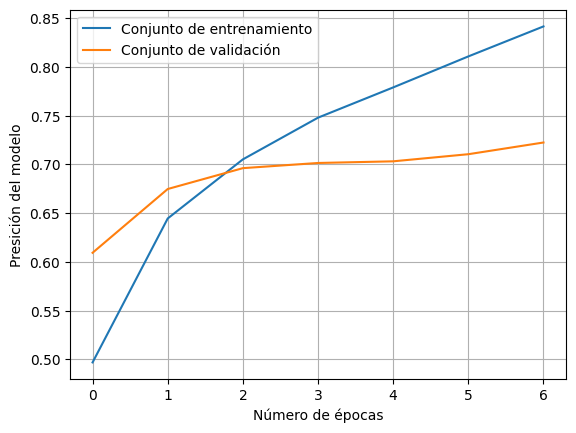

In [11]:
plt.plot(history.history['accuracy'], label='Conjunto de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Conjunto de validación')
plt.xlabel('Número de épocas')
plt.ylabel('Presición del modelo')
plt.legend()
plt.grid()